In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# reading csv file
df=pd.read_csv("../Book-sales-eda/Books_Data_Clean.csv")
print(df.head())



   index  Publishing Year                        Book Name  \
0      0           1975.0                          Beowulf   
1      1           1987.0                 Batman: Year One   
2      2           2015.0                Go Set a Watchman   
3      3           2008.0  When You Are Engulfed in Flames   
4      4           2011.0         Daughter of Smoke & Bone   

                                              Author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

  Author_Rating  Book_average_rating  Book_ratings_count          genre  \
0        Novice                 3.42              155903  genre fiction   
1  Intermediate                 4.23              145267

In [ ]:
# describe the data
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [4]:
df=df[df["Publishing Year"]>1900]

In [5]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [ ]:
# drops book name as so many null values
df.dropna(subset='Book Name',inplace=True)

In [ ]:
# duplicates value
df.duplicated().sum()

np.int64(0)

In [ ]:
# Number of unique rows
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

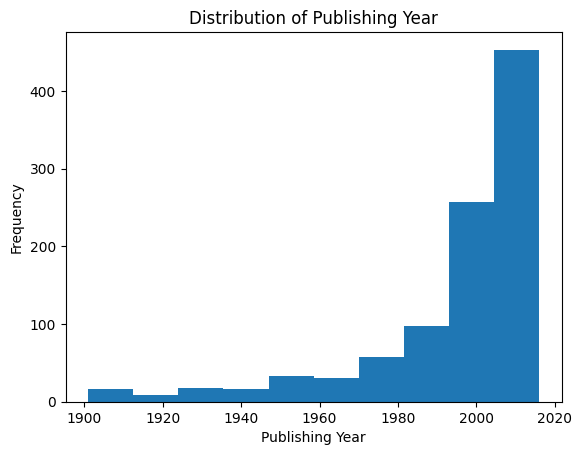

In [45]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")
plt.show()

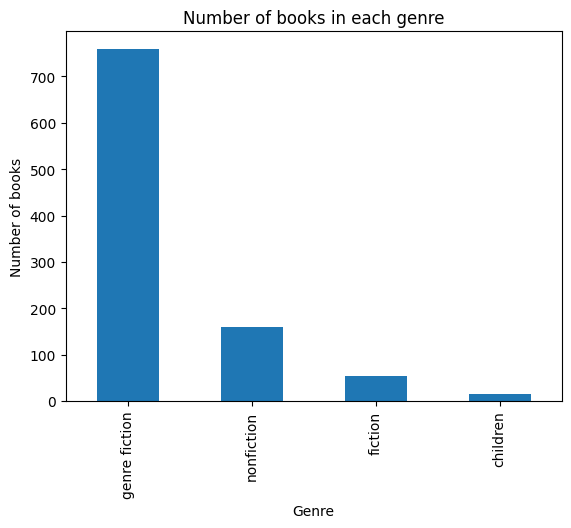

In [60]:
df["genre"].value_counts().plot(kind='bar')
plt.xlabel("Genre")
plt.ylabel("Number of books")
plt.title("Number of books in each genre")
plt.show()

In [61]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

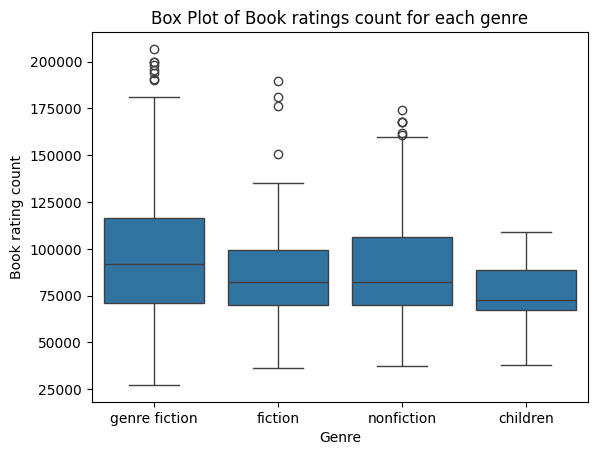

In [62]:
sns.boxplot(x="genre",y="Book_ratings_count",data=df)
plt.xlabel("Genre")
plt.ylabel("Book rating count")
plt.title("Box Plot of Book ratings count for each genre")
plt.show()


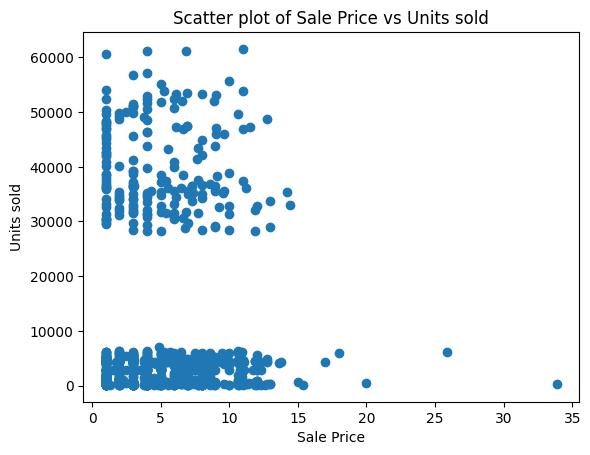

In [63]:
plt.scatter(df["sale price"],df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units sold")
plt.title("Scatter plot of Sale Price vs Units sold")
plt.show()

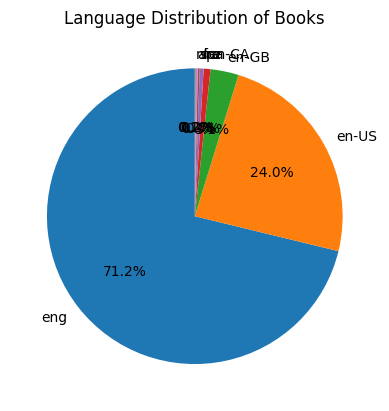

In [64]:
language_count=df["language_code"].value_counts()
plt.pie(language_count,labels=language_count.index,startangle=90,autopct='%1.1f%%')
plt.title("Language Distribution of Books")
plt.show()

In [65]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [66]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

In [67]:
df.groupby("Author")["Book_ratings_count"].mean().sort_values(ascending=False).max()

np.float64(199872.0)

In [68]:
df.groupby("language_code").size().sort_values(ascending=True)

language_code
nl         1
ara        2
spa        2
fre        4
en-CA      7
en-GB     29
en-US    226
eng      670
dtype: int64

In [69]:
df.groupby("Author_Rating")["Book_ratings_count"].var()

Author_Rating
Excellent       4.419857e+08
Famous          1.227555e+09
Intermediate    1.170331e+09
Novice          9.523157e+08
Name: Book_ratings_count, dtype: float64

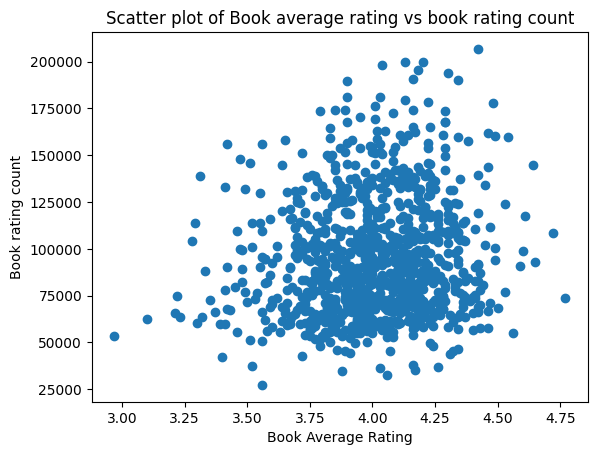

In [70]:
plt.scatter(df["Book_average_rating"],df["Book_ratings_count"])
plt.xlabel("Book Average Rating")
plt.ylabel("Book rating count")
plt.title("Scatter plot of Book average rating vs book rating count")
plt.show()

In [71]:
total_gross_sales_by_author=df.groupby("Author")["gross sales"].sum()

<Axes: xlabel='Author'>

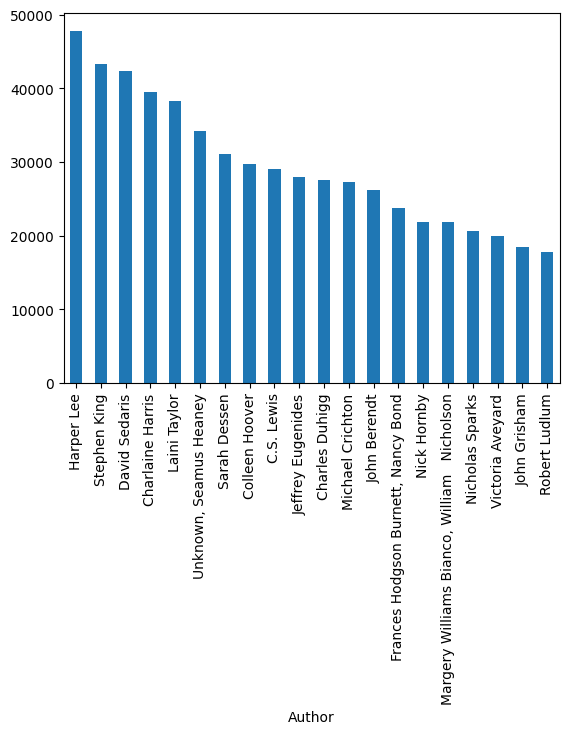

In [72]:
total_gross_sales_by_author.sort_values(ascending=False).head(20).plot(kind='bar')

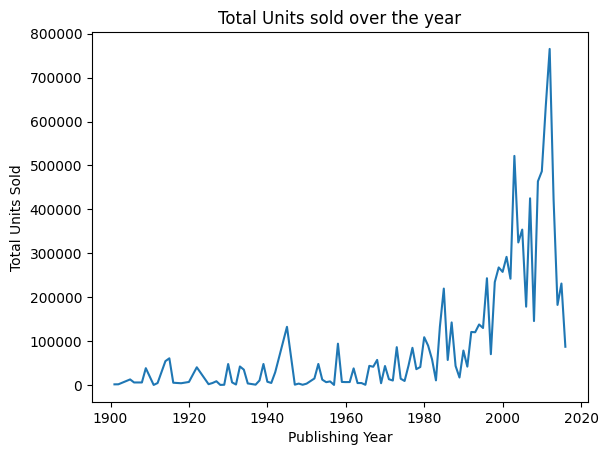

In [73]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind='line',)
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units sold over the year")
plt.show()